# Технологии обработки больших данных

Занятие 4. Работа с SQL запросами в PySpark 

1. Запуск PySpark на локальной машине
2. TempView - представления DataFrame
3. Базовый синтаксис SQL
4. Домашнее задание 
  
**Рекомендованная литература:** Б.Форта. SQL за 10 минут (Можно найти на гугл [диске](https://drive.google.com/drive/folders/14igaMTWTQvEszOYKfnVkjc8A0bpXLx3e?usp=sharing)).

![](img/spark_libs.png)

### 1. Запуск PySpark на локальной машине

# Запускайте в изолированой среде venv / conda env

! pip install pyspark

In [1]:
! pip install pyspark
import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


### 2. View - представления DataFrame

**Columns**  

Age - возраст (numeric)  
Sex - пол (text: male, female)  
Job - уровень рабочей квалификации (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing - жилье (text: own, rent, or free)  
Saving accounts - накопления (text - little, moderate, quite rich, rich)  
Checking account - средние траты (numeric, in DM - Deutsch Mark)  
Credit amount - размер кредита (numeric, in DM)  
Duration - срок кредита (numeric, in month)  
Purpose - цель кредита (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [3]:
DATA_PATH = 'credit_data.csv'

SCHEMA = "id INT, Age INT, Sex STRING, Job INT, Housing STRING, Saving_accounts STRING, \
Checking_account STRING, Credit_amount INT, Duration INT, Purpose STRING"

df = spark.read.csv(DATA_PATH, schema=SCHEMA, header=True)
type(df)

pyspark.sql.dataframe.DataFrame

In [4]:
df.createOrReplaceTempView("credit_table")

С помощью запросов SQL можно создавать новые представления DataFrame

In [5]:
sub_df = spark.sql("SELECT id, Age, Sex FROM credit_table ")
sub_df.show(10)

+---+---+------+
| id|Age|   Sex|
+---+---+------+
|  0| 67|  male|
|  1| 22|female|
|  2| 49|  male|
|  3| 45|  male|
|  4| 53|  male|
|  5| 35|  male|
|  6| 53|  male|
|  7| 35|  male|
|  8| 61|  male|
|  9| 28|  male|
+---+---+------+
only showing top 10 rows



### 3. Базовый синтаксис SQL

#### Извлечение отдельных столбцов

In [6]:
spark.sql("SELECT Age FROM credit_table ").show(5)

+---+
|Age|
+---+
| 67|
| 22|
| 49|
| 45|
| 53|
+---+
only showing top 5 rows



#### Извлечение всех столбцов

In [7]:
spark.sql("SELECT * FROM credit_table ").show(5)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|  0| 67|  male|  2|    own|             NA|          little|         1169|       6|           radio/TV|
|  1| 22|female|  2|    own|         little|        moderate|         5951|      48|           radio/TV|
|  2| 49|  male|  1|    own|         little|              NA|         2096|      12|          education|
|  3| 45|  male|  2|   free|         little|          little|         7882|      42|furniture/equipment|
|  4| 53|  male|  2|   free|         little|          little|         4870|      24|                car|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
only showing top 5 rows



#### Извлечение уникальных строк

In [8]:
spark.sql("SELECT DISTINCT Purpose FROM credit_table ").show()

+-------------------+
|            Purpose|
+-------------------+
|          education|
|           radio/TV|
|    vacation/others|
|domestic appliances|
|                car|
|           business|
|            repairs|
|furniture/equipment|
+-------------------+



#### Ограничение результатов запроса

In [9]:
spark.sql("SELECT * FROM credit_table LIMIT 5").show()

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|  0| 67|  male|  2|    own|             NA|          little|         1169|       6|           radio/TV|
|  1| 22|female|  2|    own|         little|        moderate|         5951|      48|           radio/TV|
|  2| 49|  male|  1|    own|         little|              NA|         2096|      12|          education|
|  3| 45|  male|  2|   free|         little|          little|         7882|      42|furniture/equipment|
|  4| 53|  male|  2|   free|         little|          little|         4870|      24|                car|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+



### Сортировка по строкам таблицы

In [10]:
spark.sql("SELECT * FROM credit_table ORDER BY Duration").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|234| 42|  male|  1|    own|         little|              NA|         1544|       4|           radio/TV|
|943| 42|  male|  1|    own|         little|              NA|         1455|       4|                car|
|527| 42|  male|  1|    own|         little|              NA|         1503|       4|           radio/TV|
|734| 37|female|  2|    own|         little|              NA|         3380|       4|                car|
|314| 29|  male|  1|    own|             NA|            rich|         1494|       4|                car|
|837| 23|female|  1|   rent|         little|              NA|          601|       4|furniture/equipment|
|430| 74|  male|  1|    own|         little|           

In [11]:
# Few columns sorting
spark.sql("SELECT * FROM credit_table ORDER BY Duration, Credit_amount").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|837| 23|female|  1|   rent|         little|              NA|          601|       4|furniture/equipment|
|943| 42|  male|  1|    own|         little|              NA|         1455|       4|                car|
|314| 29|  male|  1|    own|             NA|            rich|         1494|       4|                car|
|527| 42|  male|  1|    own|         little|              NA|         1503|       4|           radio/TV|
|234| 42|  male|  1|    own|         little|              NA|         1544|       4|           radio/TV|
|734| 37|female|  2|    own|         little|              NA|         3380|       4|                car|
|430| 74|  male|  1|    own|         little|           

#### Сортировка с указанием номера столбца

In [12]:
spark.sql("SELECT * FROM credit_table ORDER BY 2, 3").show()

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|391| 19|female|  1|   rent|           rich|        moderate|          983|      12|furniture/equipment|
|633| 19|female|  2|   rent|         little|              NA|         1980|       9|furniture/equipment|
|155| 20|female|  2|   rent|         little|          little|         1282|      12|furniture/equipment|
|296| 20|female|  2|   rent|             NA|              NA|         4675|      12|                car|
|410| 20|female|  2|    own|         little|        moderate|         1967|      24|           radio/TV|
|420| 20|female|  2|   rent|           rich|              NA|         3186|      15|                car|
|585| 20|female|  2|   rent|         little|          l

####  Направления сортировки - *DESC*

In [13]:
spark.sql("SELECT * FROM credit_table ORDER BY Duration DESC").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+---------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|        Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+---------------+
|677| 24|  male|  2|    own|       moderate|        moderate|         5595|      72|       radio/TV|
|938| 42|  male|  2|   free|         little|        moderate|         6288|      60|      education|
|255| 27|  male|  1|    own|             NA|        moderate|         7418|      60|       radio/TV|
|332| 24|female|  3|    own|       moderate|        moderate|         7408|      60|            car|
|672| 42|  male|  3|    own|         little|              NA|        10366|      60|            car|
|373| 63|  male|  3|   free|             NA|              NA|        13756|      60|            car|
|134| 21|female|  2|    own|       moderate|              NA|        10144|      60|       

In [14]:
spark.sql("SELECT * FROM credit_table ORDER BY Credit_amount DESC, Duration ").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+---------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|        Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+---------------+
|915| 32|female|  3|    own|         little|        moderate|        18424|      48|vacation/others|
| 95| 58|  male|  2|   rent|         little|        moderate|        15945|      54|       business|
|818| 43|  male|  3|    own|         little|          little|        15857|      36|vacation/others|
|887| 23|  male|  2|    own|         little|        moderate|        15672|      48|       business|
|637| 21|  male|  2|    own|         little|              NA|        15653|      60|       radio/TV|
|917| 68|  male|  3|    own|         little|          little|        14896|       6|            car|
|374| 60|female|  3|   free|       moderate|        moderate|        14782|      60|vacatio

### Фильтрация данных

#### Оператор WHERE

In [15]:
spark.sql("SELECT * FROM credit_table WHERE Purpose = 'car' ").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------+
|  4| 53|  male|  2|   free|         little|          little|         4870|      24|    car|
|  7| 35|  male|  3|   rent|         little|        moderate|         6948|      36|    car|
|  9| 28|  male|  3|    own|         little|        moderate|         5234|      30|    car|
| 10| 25|female|  2|   rent|         little|        moderate|         1295|      12|    car|
| 13| 60|  male|  1|    own|         little|          little|         1199|      24|    car|
| 14| 28|female|  2|   rent|         little|          little|         1403|      15|    car|
| 18| 44|female|  3|   free|         little|        moderate|        12579|      24|    car|
| 20| 48|  male|  2|    own|         little|              NA|         

#### Операторы WHERE  

In [16]:
#  =  Равенство
#  <> Неравенство
#  != Неравенство
#  <  Меньше
#  <= Меньше или равно
#  !< Не меньше
#  >  Больше
#  >= Больше или равно
#  !> Не больше
#  BETWEEN Вхождение в диапазон
#  IS NULL Значение NULL

In [17]:
spark.sql("SELECT * FROM credit_table WHERE Housing != 'free' ").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|  0| 67|  male|  2|    own|             NA|          little|         1169|       6|           radio/TV|
|  1| 22|female|  2|    own|         little|        moderate|         5951|      48|           radio/TV|
|  2| 49|  male|  1|    own|         little|              NA|         2096|      12|          education|
|  6| 53|  male|  2|    own|     quite rich|              NA|         2835|      24|furniture/equipment|
|  7| 35|  male|  3|   rent|         little|        moderate|         6948|      36|                car|
|  8| 61|  male|  1|    own|           rich|              NA|         3059|      12|           radio/TV|
|  9| 28|  male|  3|    own|         little|        mod

In [18]:
spark.sql("SELECT * FROM credit_table WHERE Credit_amount BETWEEN 1000 AND 2000 ").show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|  0| 67|  male|  2|    own|             NA|          little|         1169|       6|           radio/TV|
| 10| 25|female|  2|   rent|         little|        moderate|         1295|      12|                car|
| 12| 22|female|  2|    own|         little|        moderate|         1567|      12|           radio/TV|
| 13| 60|  male|  1|    own|         little|          little|         1199|      24|                car|
| 14| 28|female|  2|   rent|         little|          little|         1403|      15|                car|
| 15| 32|female|  1|    own|       moderate|          little|         1282|      24|           radio/TV|
| 23| 44|  male|  2|    own|       moderate|        mod

### Расширенная фильтрация данных

#### Комбинирование условий WHERE

In [19]:
spark.sql("""SELECT * FROM credit_table 
                WHERE Credit_amount > 10000
                  AND Purpose = 'car' 
                ORDER BY Credit_amount
                """).show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------+
|304| 44|  male|  2|   free|     quite rich|              NA|        10127|      48|    car|
|927| 39|  male|  2|   free|         little|          little|        10297|      48|    car|
|672| 42|  male|  3|    own|         little|              NA|        10366|      60|    car|
|902| 42|  male|  2|   free|             NA|              NA|        10477|      36|    car|
|205| 38|  male|  3|   free|         little|          little|        10623|      30|    car|
|285| 35|female|  1|    own|         little|          little|        10722|      47|    car|
|854| 45|  male|  2|    own|         little|              NA|        10875|      36|    car|
|450| 30|  male|  3|    own|             NA|              NA|        1

#### Условие OR

In [20]:
spark.sql("""SELECT * FROM credit_table 
                WHERE Purpose = 'furniture/equipment'
                   OR Purpose = 'business' 
                ORDER BY Credit_amount
                """).show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|750| 49|female|  2|    own|         little|          little|          428|       6|furniture/equipment|
|837| 23|female|  1|   rent|         little|              NA|          601|       4|furniture/equipment|
|439| 26|female|  0|    own|         little|            rich|          609|      12|           business|
|869| 24|female|  2|   rent|         little|          little|          652|      12|furniture/equipment|
|316| 38|  male|  1|    own|         little|          little|          708|      12|furniture/equipment|
|171| 26|female|  2|    own|         little|              NA|          763|      12|furniture/equipment|
|573| 22|female|  1|    own|         little|          l

####  Условие вхождения в множество IN

In [21]:
spark.sql("""SELECT * FROM credit_table 
                WHERE Purpose IN ('furniture/equipment', 'business')
                ORDER BY Credit_amount
                """).show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|750| 49|female|  2|    own|         little|          little|          428|       6|furniture/equipment|
|837| 23|female|  1|   rent|         little|              NA|          601|       4|furniture/equipment|
|439| 26|female|  0|    own|         little|            rich|          609|      12|           business|
|869| 24|female|  2|   rent|         little|          little|          652|      12|furniture/equipment|
|316| 38|  male|  1|    own|         little|          little|          708|      12|furniture/equipment|
|171| 26|female|  2|    own|         little|              NA|          763|      12|furniture/equipment|
|573| 22|female|  1|    own|         little|          l

####  Условие NOT

In [22]:
spark.sql("""SELECT * FROM credit_table 
                WHERE Purpose IN ('furniture/equipment', 'business')
                  AND NOT Job = 0
                ORDER BY Credit_amount
                """).show(10)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|750| 49|female|  2|    own|         little|          little|          428|       6|furniture/equipment|
|837| 23|female|  1|   rent|         little|              NA|          601|       4|furniture/equipment|
|869| 24|female|  2|   rent|         little|          little|          652|      12|furniture/equipment|
|316| 38|  male|  1|    own|         little|          little|          708|      12|furniture/equipment|
|171| 26|female|  2|    own|         little|              NA|          763|      12|furniture/equipment|
|573| 22|female|  1|    own|         little|          little|          806|      15|           business|
|752| 23|female|  1|   rent|       moderate|        mod

### Фильтрация с использованием метасимволов

**Метасимволы** - Специальные символы, применяемые для поиска части значения.

**Шаблон поиска** - Условие отбора строк, состоящее из текста, метасимволов и любой их комбинации.


#### Оператор LIKE

Метасимвол **знак процента (%)** в шаблоне поиска означает найти все вхождения любого символа.  
Метасимвол **знак подчеркивания (_)** используется так же, как и знак %, но при этом учитывается не множество символов, а только один.  

In [23]:
spark.sql("""SELECT DISTINCT Purpose FROM credit_table 
                WHERE Purpose LIKE '%/%' 
                """).show(10)

+-------------------+
|            Purpose|
+-------------------+
|           radio/TV|
|    vacation/others|
|furniture/equipment|
+-------------------+



In [24]:
spark.sql("""SELECT * FROM credit_table 
                WHERE Housing LIKE 'ow_' 
                """).show(5)

+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
| id|Age|   Sex|Job|Housing|Saving_accounts|Checking_account|Credit_amount|Duration|            Purpose|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
|  0| 67|  male|  2|    own|             NA|          little|         1169|       6|           radio/TV|
|  1| 22|female|  2|    own|         little|        moderate|         5951|      48|           radio/TV|
|  2| 49|  male|  1|    own|         little|              NA|         2096|      12|          education|
|  6| 53|  male|  2|    own|     quite rich|              NA|         2835|      24|furniture/equipment|
|  8| 61|  male|  1|    own|           rich|              NA|         3059|      12|           radio/TV|
+---+---+------+---+-------+---------------+----------------+-------------+--------+-------------------+
only showing top 5 rows



### Создание вычисляемых полей

**Поле** по сути то же самое, что и столбец. В основном эти термины взаимозаменяемы, хотя столбцы таблиц обычно называют столбцами, а термин поле чаще применяется по отношению к вычисляемым полям.


In [25]:
spark.sql("""SELECT id, Age, Sex, Purpose, 
                    Credit_amount / Duration AS Month_payment
                    FROM credit_table 
             """).show(5)

+---+---+------+-------------------+------------------+
| id|Age|   Sex|            Purpose|     Month_payment|
+---+---+------+-------------------+------------------+
|  0| 67|  male|           radio/TV|194.83333333333334|
|  1| 22|female|           radio/TV|123.97916666666667|
|  2| 49|  male|          education|174.66666666666666|
|  3| 45|  male|furniture/equipment|187.66666666666666|
|  4| 53|  male|                car|202.91666666666666|
+---+---+------+-------------------+------------------+
only showing top 5 rows



## 4. Домашнее задание 

Решение должно быть с использованием SQL!

1. Сколько мужчин и женщин (признак Sex) представлено в этом наборе данных?

In [26]:
print("Мужчин в наборе:")
spark.sql("""SELECT count(*) FROM credit_table 
                WHERE Sex = 'male'
                """).show()
print("Женщин в наборе:")
spark.sql("""SELECT count(*) FROM credit_table 
                WHERE Sex = 'female'
                """).show()

Мужчин в наборе:
+--------+
|count(1)|
+--------+
|     690|
+--------+

Женщин в наборе:
+--------+
|count(1)|
+--------+
|     310|
+--------+



2. Каков средний возраст (признак Age) женщин?

In [27]:
print("Средний возраст женщин")
spark.sql("""SELECT sum(Age)/310 FROM credit_table 
                WHERE Sex = 'female'
                """).show()

Средний возраст женщин
+------------------+
|  (sum(Age) / 310)|
+------------------+
|32.803225806451614|
+------------------+



3. Какова доля заемщиков с собственным жильем (признак Housing)?

In [28]:
print("Доля заемщиков с собственным жильем")
spark.sql("""SELECT count(*)/1000*100 as Persent_of_own_Housing FROM credit_table 
                WHERE Housing = 'own'
                """).show()

Доля заемщиков с собственным жильем
+----------------------+
|Persent_of_own_Housing|
+----------------------+
|                  71.3|
+----------------------+



4. Каково среднее значение возраста тех, кто имеет высокие накопления (признак Saving_accounts)?

In [29]:
print("Cреднее значение возраста тех, кто имеет высокие накопления")
spark.sql("""SELECT sum(Age)/count(*) FROM credit_table 
                WHERE Saving_accounts = 'rich'
                """).show()

Cреднее значение возраста тех, кто имеет высокие накопления
+---------------------+
|(sum(Age) / count(1))|
+---------------------+
|   37.166666666666664|
+---------------------+



5. Каково среднеквадратичное отклонения возраста тех, кто имеет высокие накопления (признак Saving_accounts)?

In [30]:
print("Cреднеквадратичное отклонения возраста тех, кто имеет высокие накопления")
new_df=spark.sql("""SELECT Age FROM credit_table 
                WHERE Saving_accounts = 'rich'
                """)
new_df.toPandas().std()

Cреднеквадратичное отклонения возраста тех, кто имеет высокие накопления


Age    11.854317
dtype: float64

6. Выведите гистограмму категорий покупок (признак Purpose) для мужчин и женщин.

Гистограмма гатегорий покупок для мужчин


<AxesSubplot:xlabel='Purpose'>

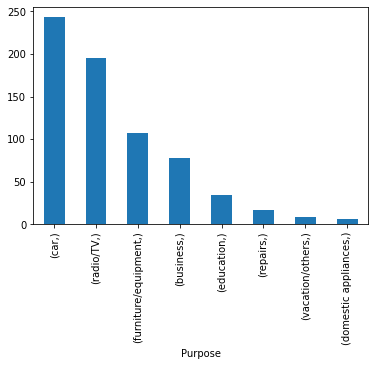

In [31]:
print("Гистограмма гатегорий покупок для мужчин")
new_df=spark.sql("""SELECT Purpose FROM credit_table 
                WHERE Sex = 'male'
                """)
new_df.toPandas().value_counts().plot(kind="bar")

Гистограмма гатегорий покупок для женщин


<AxesSubplot:xlabel='Purpose'>

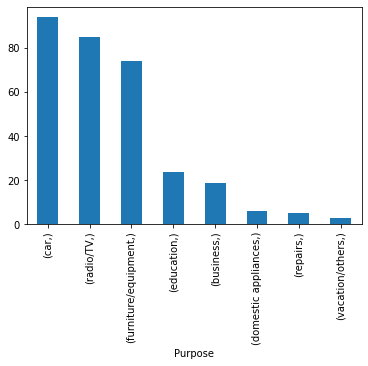

In [32]:
print("Гистограмма гатегорий покупок для женщин")
new_df=spark.sql("""SELECT Purpose FROM credit_table 
                WHERE Sex = 'female'
                """)
new_df.toPandas().value_counts().plot(kind="bar")

7. На что чаще всего берутся длинные кредиты (более 24 мес)?

In [60]:
spark.sql("""SELECT count(Purpose), Purpose
                FROM credit_table 
                WHERE Duration > 24
                GROUP BY Purpose
                ORDER BY count(Purpose) DESC
                """).show()

На что чаще всего берутся длинные кредиты 
+--------------+-------------------+
|count(Purpose)|            Purpose|
+--------------+-------------------+
|            74|                car|
|            58|           radio/TV|
|            41|           business|
|            31|furniture/equipment|
|            14|          education|
|             5|    vacation/others|
|             5|            repairs|
|             2|domestic appliances|
+--------------+-------------------+



8. Какой средний срок кредита (признак Duration) для заемщиков, имеющих высокие текущие траты (признак Checking_account)?

In [69]:
spark.sql("""SELECT AVG(Duration)
                FROM credit_table 
                WHERE Checking_account = 'rich'
                """).show()

+------------------+
|     avg(Duration)|
+------------------+
|17.349206349206348|
+------------------+



9. Какой средний срок кредита (признак Duration) для заемщиков, имеющих низкие текущие траты (признак Checking_account)?

In [70]:
spark.sql("""SELECT AVG(Duration)
                FROM credit_table 
                WHERE Checking_account = 'little'
                """).show()

+-----------------+
|    avg(Duration)|
+-----------------+
|21.33941605839416|
+-----------------+



10. На какую цель взят самый дорогой кредит?

In [77]:
spark.sql("""SELECT Purpose
                FROM credit_table 
                WHERE Credit_amount = (SELECT MAX(Credit_amount) FROM credit_table )
                """).show()

+---------------+
|        Purpose|
+---------------+
|vacation/others|
+---------------+

